In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sesd import seasonal_esd

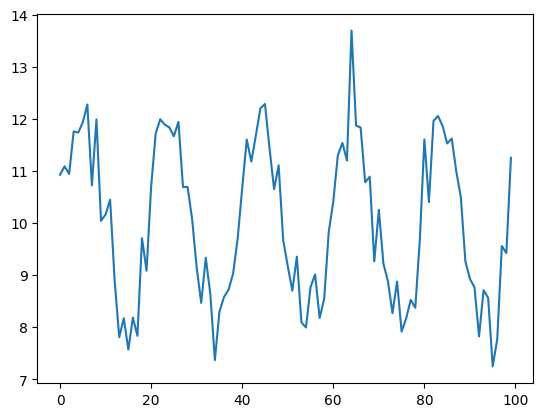

In [2]:
# Let's create a periodic time series with a bit of noise.
n = 100
ts = 10 + 2 * np.sin(np.arange(n) / np.pi) + np.random.normal(loc=0, scale=0.5, size=n)
plt.plot(ts)

In [3]:
# no anomalies expected with one-sided test for mininum values
_ = seasonal_esd(ts, periodicity=20, two_sided=False, one_sided_type="min")


    Repeated one-sided (min) Grubbs test 

    H0:  there are no anomalies in the data
    Ha:  there are up to 10 anomalies in the data

    Significance level:  α = 0.05
    Critical region:  Reject H0 if R > C (critical value)
    
exact number of anomalies=1	R=3.534	C=3.210 *
exact number of anomalies=2	R=2.539	C=3.206 
exact number of anomalies=3	R=2.402	C=3.203 
exact number of anomalies=4	R=2.401	C=3.199 
exact number of anomalies=5	R=2.373	C=3.196 
exact number of anomalies=6	R=2.006	C=3.192 
exact number of anomalies=7	R=1.970	C=3.188 
exact number of anomalies=8	R=1.906	C=3.185 
exact number of anomalies=9	R=1.502	C=3.181 
exact number of anomalies=10	R=1.465	C=3.177 


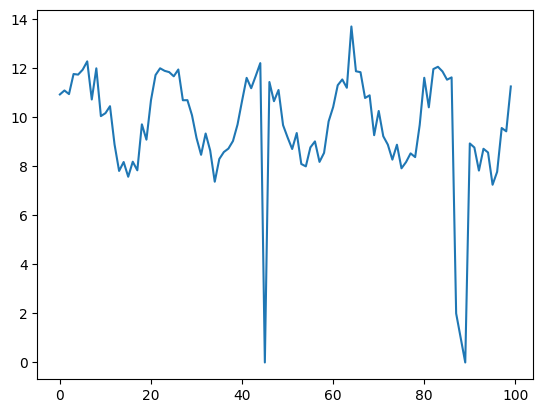

In [4]:
# Let's add a few anomalies to our time series
ts[87] = 2
ts[88] = 1
ts[89] = 0
ts[45] = 0

plt.plot(ts)

In [5]:
# the four anomalies have been identified
anomalies_idx = seasonal_esd(ts, alpha=0.01, max_anomalies=10, two_sided=False, one_sided_type="min")


    Repeated one-sided (min) Grubbs test 

    H0:  there are no anomalies in the data
    Ha:  there are up to 10 anomalies in the data

    Significance level:  α = 0.01
    Critical region:  Reject H0 if R > C (critical value)
    
exact number of anomalies=1	R=5.688	C=3.600 *
exact number of anomalies=2	R=5.705	C=3.597 *
exact number of anomalies=3	R=6.623	C=3.593 *
exact number of anomalies=4	R=8.887	C=3.590 *
exact number of anomalies=5	R=3.403	C=3.586 
exact number of anomalies=6	R=2.447	C=3.582 
exact number of anomalies=7	R=2.387	C=3.579 
exact number of anomalies=8	R=2.309	C=3.575 
exact number of anomalies=9	R=2.145	C=3.571 
exact number of anomalies=10	R=1.951	C=3.567 


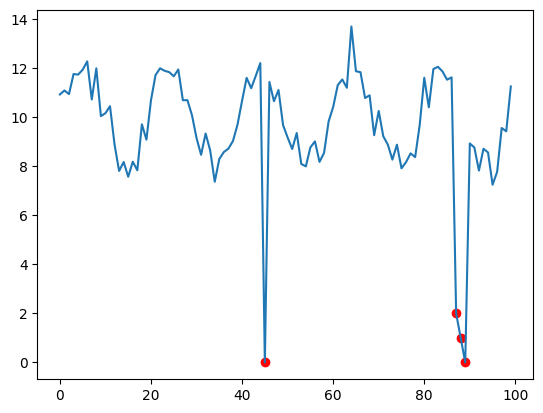

In [6]:
plt.plot(ts)
plt.scatter(anomalies_idx, ts[anomalies_idx], color="red")

In [7]:
anomalies_idx

array([45, 88, 89, 87])